In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [ ]:
car_dataset = pd.read_csv('/content/sample_data/car_data.csv')
car_dataset.head()

In [ ]:
car_dataset.describe()

In [ ]:
car_dataset.info()

In [ ]:
car_dataset.isnull().sum()

In [10]:
car_dataset['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [11]:
car_dataset['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [16]:
car_dataset['Seller_Type'].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [17]:
car_dataset = car_dataset.replace({'Petrol':0,'Diesel':1,'CNG':2})
car_dataset = car_dataset.replace({'Manual':0,'Automatic':1})
car_dataset = car_dataset.replace({'Dealer':0,'Individual':1})


In [20]:
X = car_dataset.drop(columns=['Car_Name','Selling_Price'],axis=1)
Y = car_dataset['Selling_Price']

In [21]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.1,random_state=2)

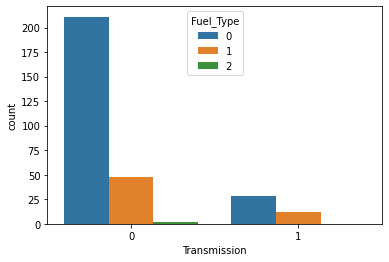

In [30]:
sns.countplot(x='Transmission',hue='Fuel_Type',data=car_dataset)

In [31]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [32]:
ypre = model.predict(x_train)
accr_1 = metrics.r2_score(y_train,ypre)
print(accr_1)

0.8799451660493711


In [34]:
ypre_1 = model.predict(x_test)
accr_2 = metrics.r2_score(y_test,ypre_1)
print(accr_2)

0.8365766715027051


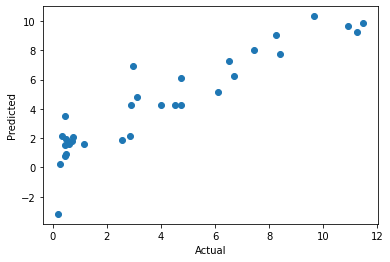

In [35]:
plt.scatter(y_test,ypre_1)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [37]:
model_1 = Lasso()
model_1.fit(x_train,y_train)

Lasso()

In [38]:
yp = model_1.predict(x_train)
yp_1 = model_1.predict(x_test)
a_1=metrics.r2_score(y_train,yp)
a_2=metrics.r2_score(y_test,yp_1)
print(a_1, a_2)

0.8427856123435794 0.8709167941173195


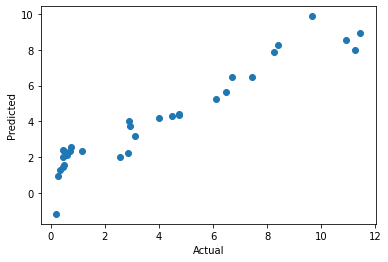

In [39]:
plt.scatter(y_test,yp_1)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()